# Chinmayee Nayak: Classification of Patient's condition using Drug Reviews

# Project Overview

# Steps of NLP PipeLine

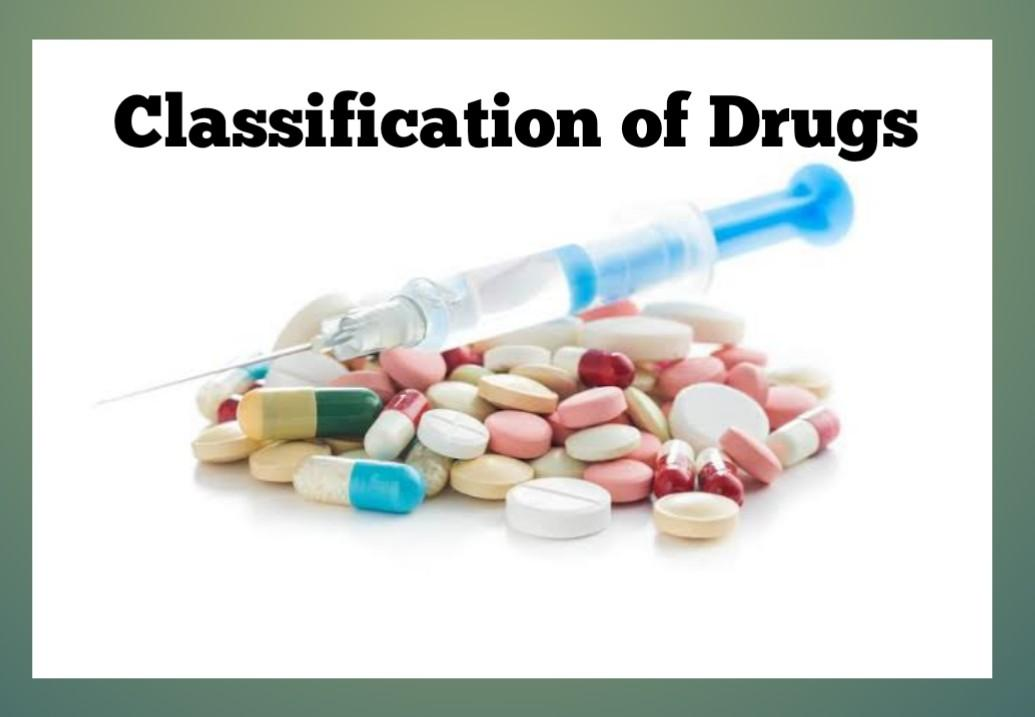

# Disease condition predcition based on drug reviews

# Importing Libraries

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows',None)


In [2]:
df = pd.read_csv("C:\\ML Projects\\drug+review+dataset+drugs+com\\drugsComTrain_raw.tsv",sep='\t')

In [3]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [4]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [5]:
df_train = df[(df['condition']=='Birth Control')| (df['condition']=='Depression')|(df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [6]:
df.shape

(161297, 7)

In [7]:
df_train.shape

(42732, 7)

In [8]:
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

# Explanatorty Data Analysis

In [9]:
X.condition.value_counts()

condition
Birth Control          28788
Depression              9069
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: count, dtype: int64

In [10]:
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [11]:
# Segregating dataframe for analyzing individual condition
X_birth = X[(X['condition']=='Birth Control')]
X_dep = X[(X['condition']=='Depression')]
X_bp = X[(X['condition']=='High Blood Pressure')]
X_diab = X[(X['condition']=='Diabetes, Type 2')]

Text(0.5, 1.0, 'Word Cloud For Birth Control')

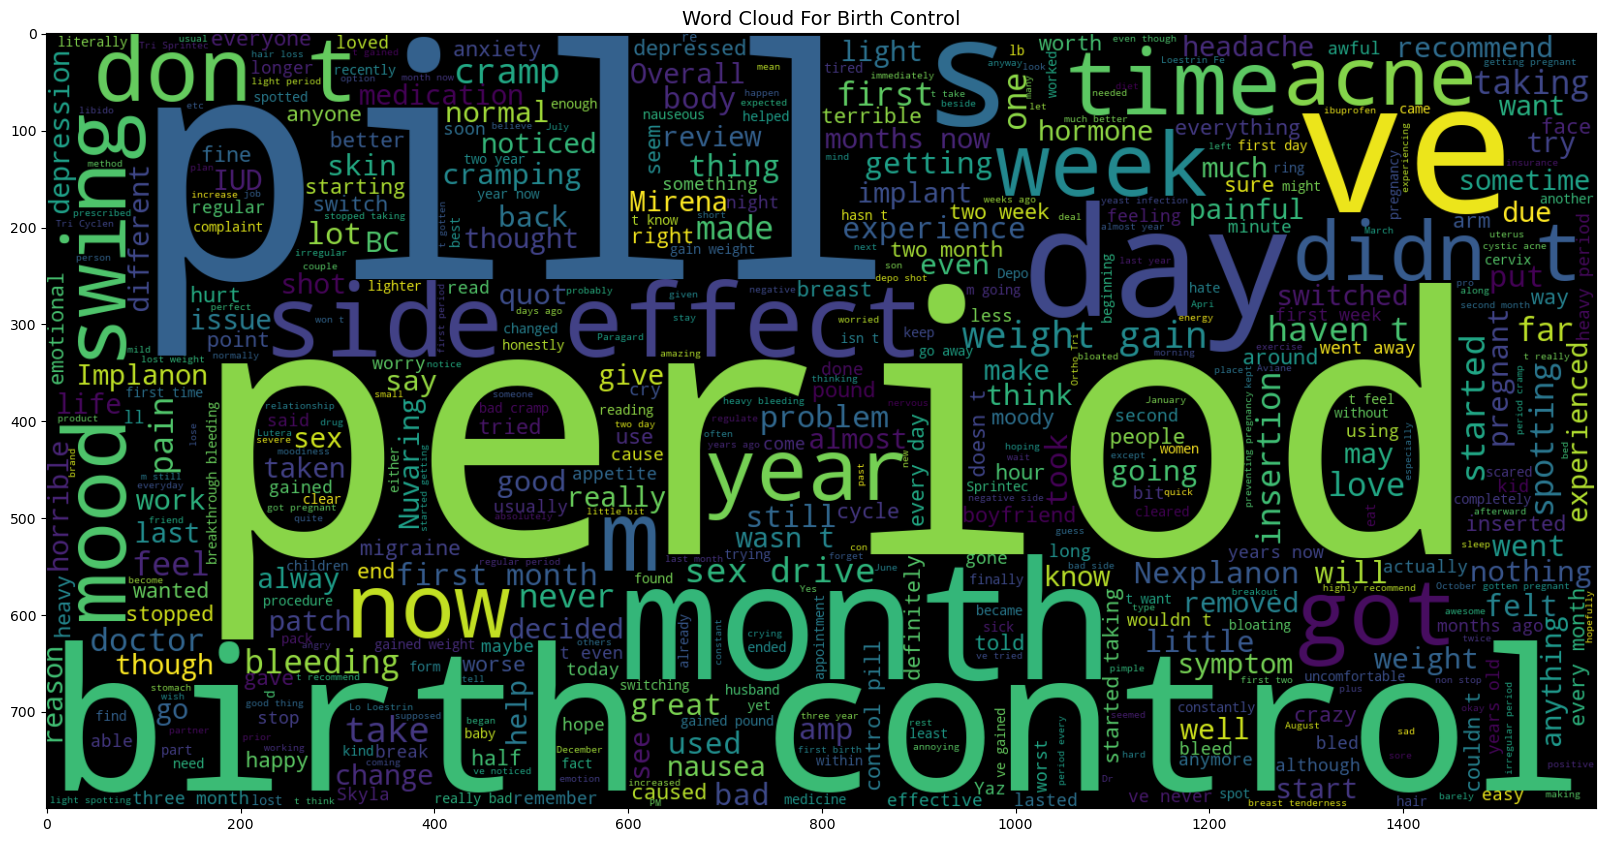

In [12]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20)) # Text that is fake news headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_birth.review))
plt.imshow(wc,interpolation= 'bilinear')
plt.title('Word Cloud For Birth Control',fontsize=14)

Text(0.5, 1.0, 'Word Cloud For Depression')

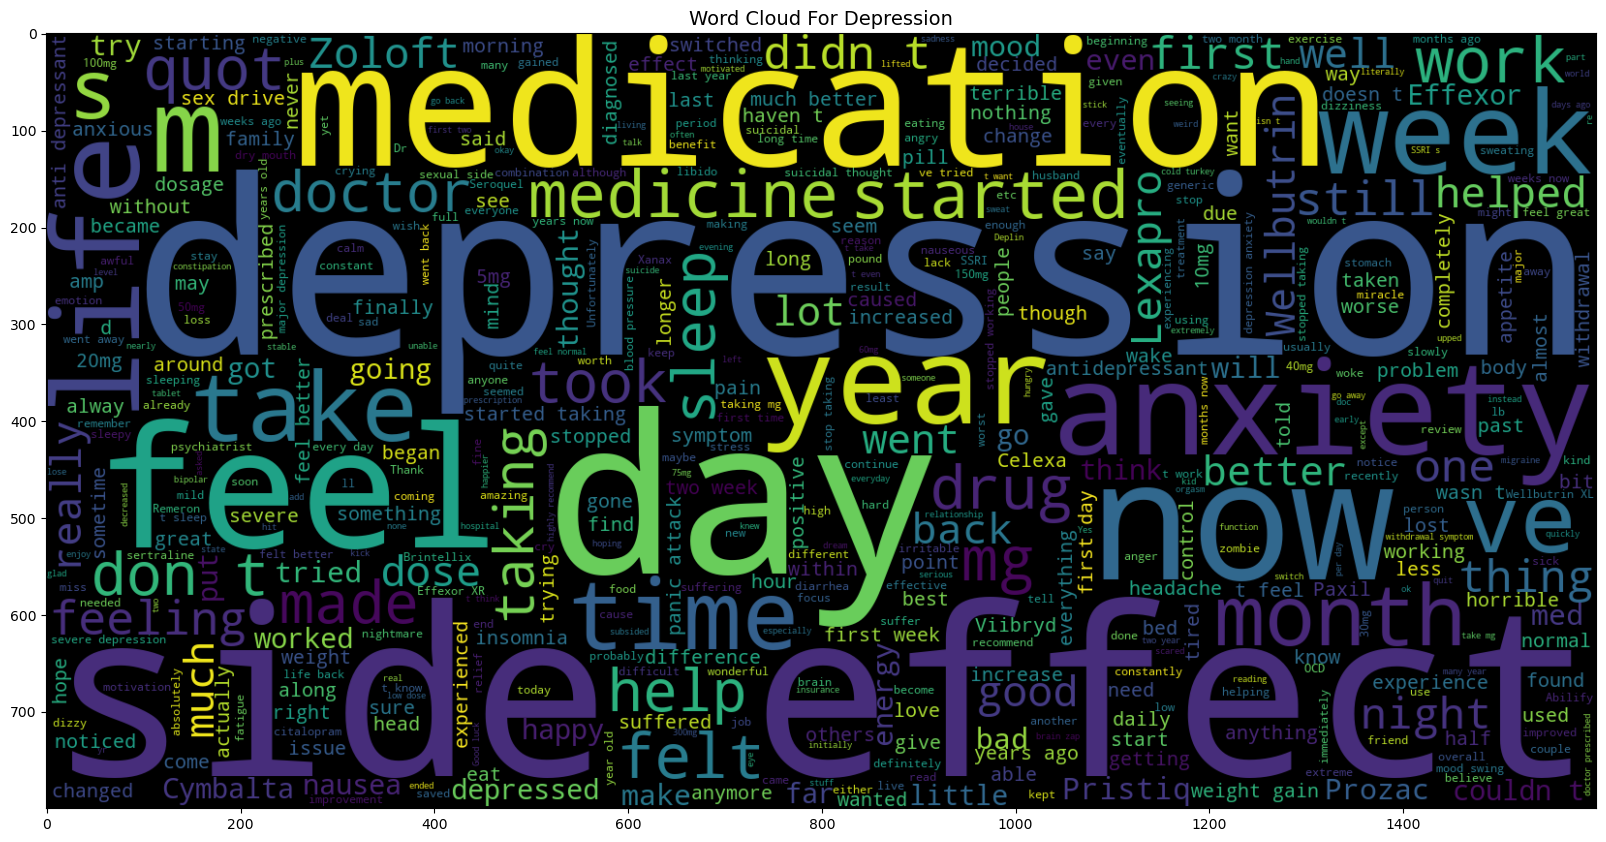

In [13]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20)) # Text that is fake news headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_dep.review))
plt.imshow(wc,interpolation= 'bilinear')
plt.title('Word Cloud For Depression',fontsize=14)

Text(0.5, 1.0, 'Word Cloud For High Blood Pressure')

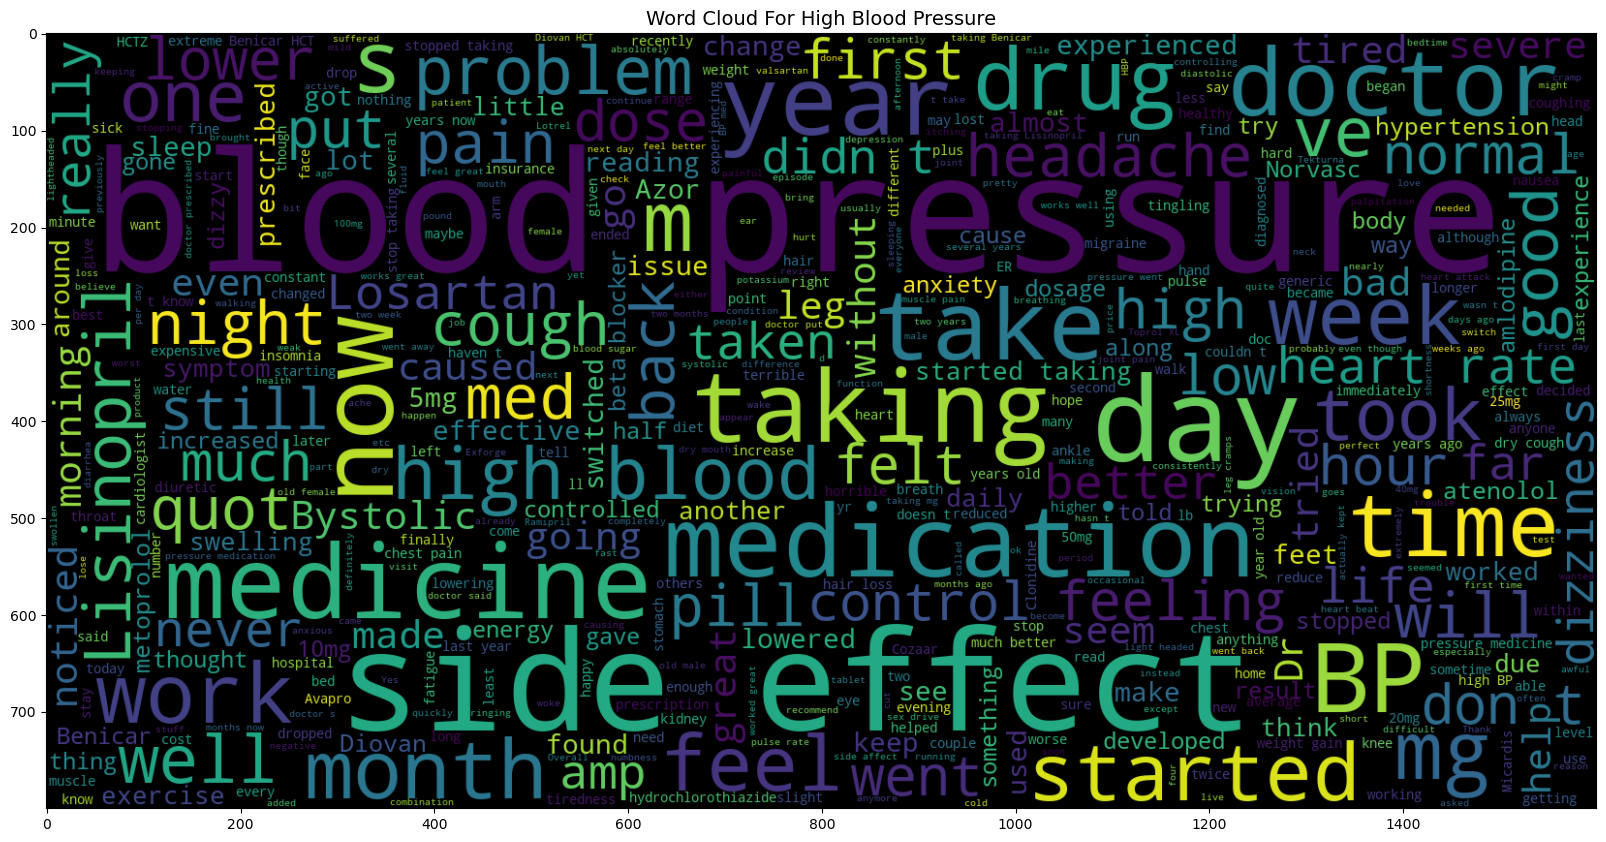

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20)) # Text that is fake news headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_bp.review))
plt.imshow(wc,interpolation= 'bilinear')
plt.title('Word Cloud For High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word Cloud For Diabetes, Type 2')

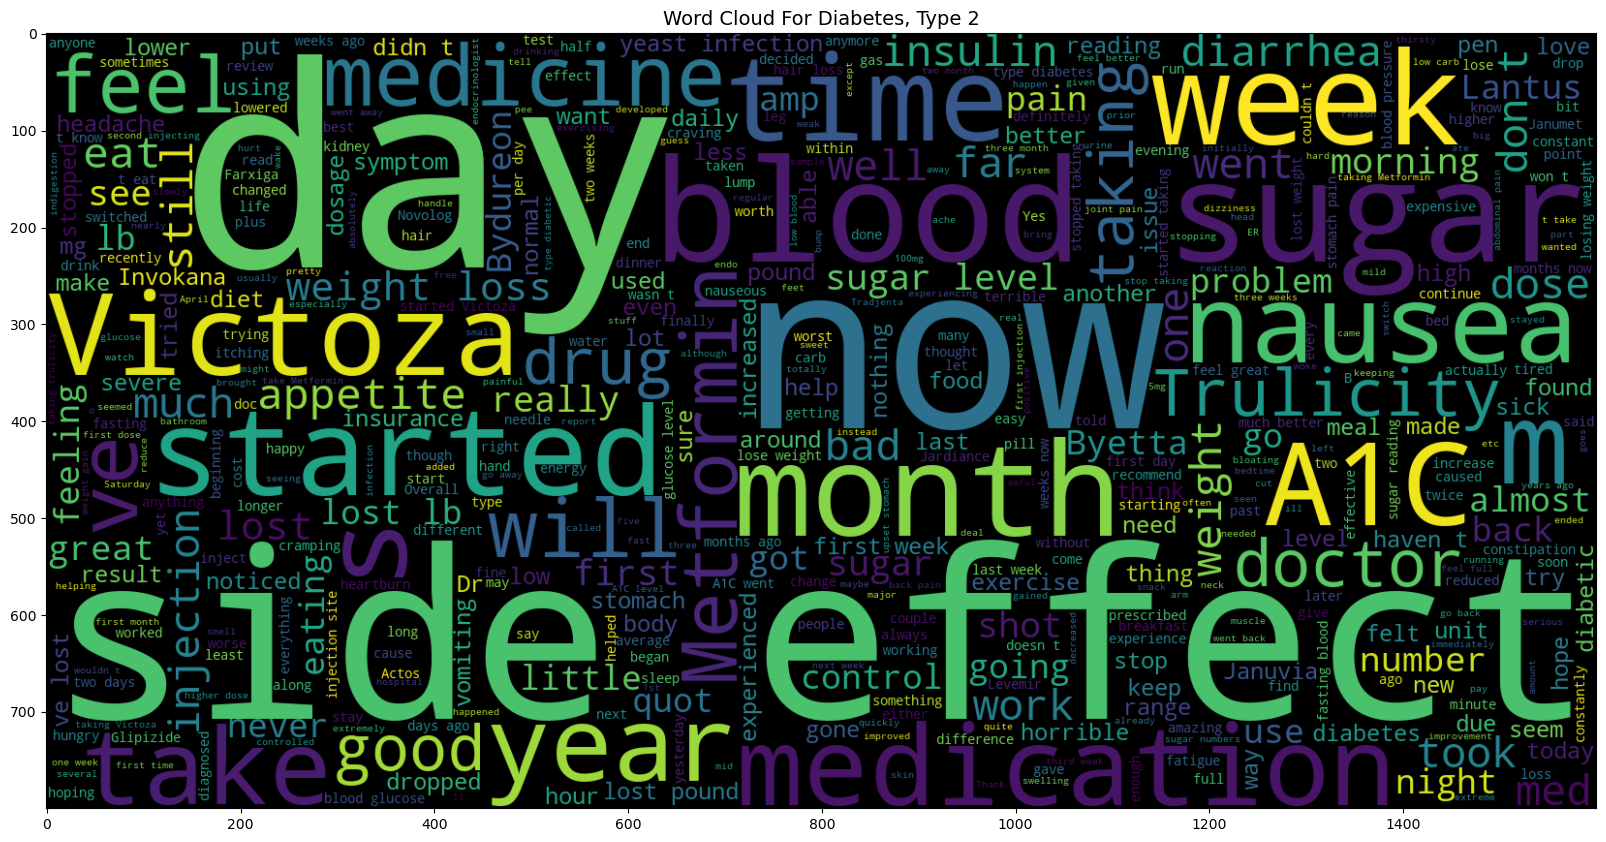

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20)) # Text that is fake news headlines
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(X_diab.review))
plt.imshow(wc,interpolation= 'bilinear')
plt.title('Word Cloud For Diabetes, Type 2',fontsize=14)

# Data Preprocessing

In [16]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [17]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [18]:
for i ,col in enumerate(X.columns):
    X.iloc[:,i] = X.iloc[:,i].str.replace('"', "")

In [19]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', None)

In [20]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.  
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch  
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.  
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now an

# What are stopwords?


Stopwords are the most frequently occurring words in a language. When constructing NLP models, these stopwords are often disregarded as they typically do not contribute significantly to the meaning of a document.

The most common word used in a text are "the","is","in","for","where","when","to","at" etc.

In [21]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [22]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Lemmitization

Lemmatization typically involves properly handling words by considering their vocabulary and conducting morphological analysis.
It aims to normalize words by reducing them to their base or dictionary form, known as the lemma. 
This process often involves removing word endings to obtain the root form of a word.

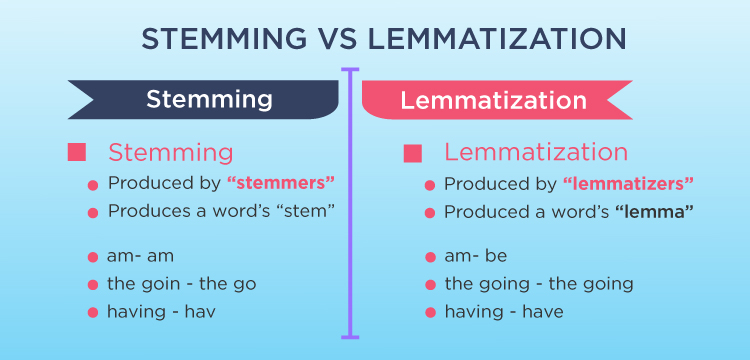

In [23]:
from IPython.display import Image
Image(filename="C:\\Users\\nchin\\Desktop\\stem.jpg")

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [25]:
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [26]:
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [27]:
from bs4 import BeautifulSoup
import re

In [28]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a Space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)  # Fixed regex syntax
    # 3. lower_letters
    words = letters_only.lower().split()
    # 4. Stopwords
    meaningful_words = [w for w in words if not w in stop]  # 'stop' variable is not defined
    # 5. Lemmatization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]  # 'lemmatizer' is not defined
    # 6. Space Join words
    return (' '.join(lemmitize_words))  # Corrected space placement

In [29]:
X['review_clean'] = X['review'].apply(review_to_words)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\738500801.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [30]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11     Depression   
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
2                                  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
9                                                      I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.   
11                                                                                                                                                                                                                                                                                                                                  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months no

# Creating features and Target Variable

In [31]:
X_feat = X['review_clean']
y = X['condition']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X_feat,y,stratify=y,test_size=0.2,random_state=0)

In [33]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap = plt.cm.Blues):
    """
    See full source and and example:
    https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize-True'
    
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion matrix,without normalization')
        
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    

# Bag of Words

In [34]:


# Initialize CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform X_train and X_test
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

In [35]:
count_train

<34185x15995 sparse matrix of type '<class 'numpy.int64'>'
	with 1092752 stored elements in Compressed Sparse Row format>

# Machine Learning Model: Naive Bayes

accuracy: 0.970
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


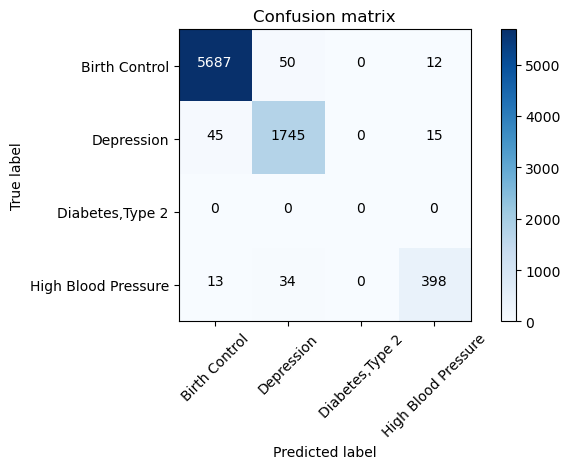

In [36]:
mnb = MultinomialNB()
mnb.fit(count_train,y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Diabetes,Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Diabetes,Type 2','High Blood Pressure'])

# Machine Learning Model: Passive Aggressive Classifier

accuracy: 0.977
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


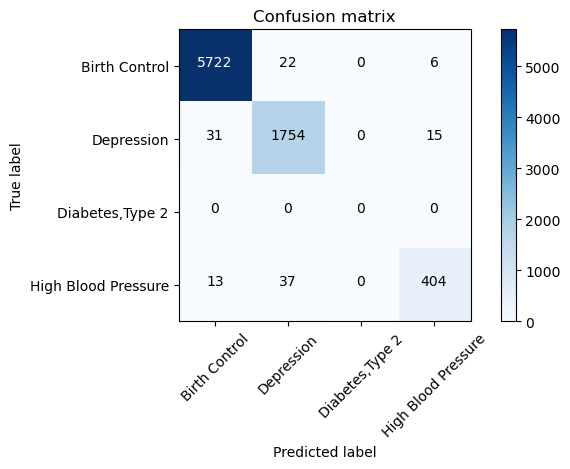

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier

passive = PassiveAggressiveClassifier()
passive.fit(count_train,y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test,pred,labels=['Birth Control','Depression','Diabetes,Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control','Depression','Diabetes,Type 2','High Blood Pressure'])

# TFIDF

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TfidfVectorizer with the specified parameters
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)

# Fit and transform the training data
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

# Machine Learning Model: Naive Bayes

accuracy: 0.921
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


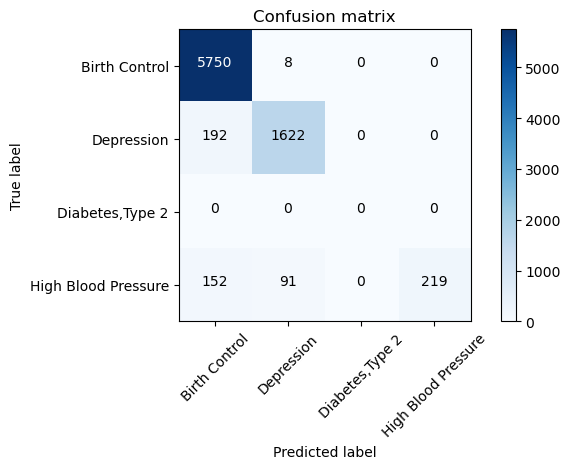

In [39]:

# Initialize and fit MultinomialNB
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)

# Predict on the test data
pred = mnb_tf.predict(tfidf_test_2)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])

# Machine Learning Model TFIDF

accuracy:   0.982
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


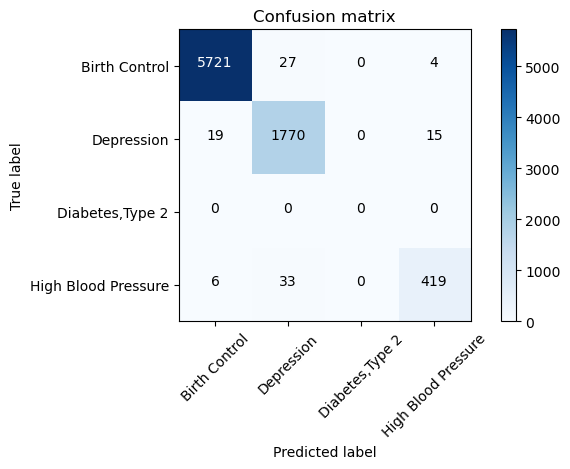

In [40]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


passive_tf = PassiveAggressiveClassifier()
passive_tf.fit(tfidf_train, y_train)

# Predict on the test data
pred = passive_tf.predict(tfidf_test)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])

# TFIDF: Bigrams

In [41]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8,ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)


accuracy:   0.985
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


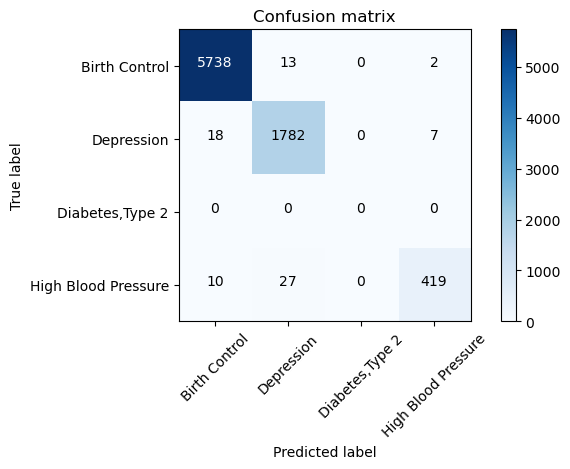

In [42]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)

# Predict on the test data
pred = pass_tf.predict(tfidf_test_2)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])

# TFIDF: Trigrams

In [43]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8,ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

accuracy:   0.985
Confusion matrix,without normalization


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23588\3196671378.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


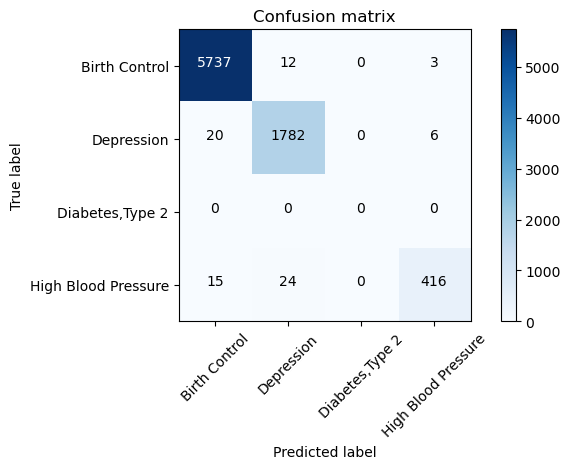

In [44]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)

# Predict on the test data
pred = pass_tf.predict(tfidf_test_3)

# Calculate accuracy
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

# Compute confusion matrix
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Diabetes,Type 2', 'High Blood Pressure'])

# Most Important Features

In [45]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]
    
    for coef, feat in topn:
        print(classlabel, feat, coef)


In [46]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control comb 0.5033887509537971
Birth Control tricyclone 0.5270626572054702
Birth Control tricylcen 0.5270626572054702
Birth Control packaged 0.5330943836319147
Birth Control correct 0.5392141455624151
Birth Control aesthetician 0.6351121289585487
Birth Control addon 0.682353814143624
Birth Control tiny 0.8422111753642466
Birth Control commit 1.2426482491206725
Birth Control freeway 7.236932949940143


In [47]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Depression')

Depression antidpressant 0.5253086858240784
Depression sink 0.5491765400585814
Depression sleepingpills 0.5642043024324668
Depression develope 0.5871812709419544
Depression sinnce 0.6225558796460233
Depression apnea 0.9090978631994164
Depression assaulted 1.0003911223100956
Depression significantly 1.1026609946204724
Depression subjective 1.1120073400481847
Depression aliveness 3.6847534164000404


In [48]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'High Blood Pressure')

High Blood Pressure fatter 0.522528873663995
High Blood Pressure fattest 0.522528873663995
High Blood Pressure end 0.5786692606924716
High Blood Pressure enforcement 0.580764636819966
High Blood Pressure barley 0.6019938118511968
High Blood Pressure encouraged 0.6161952249879508
High Blood Pressure folic 0.6245765752366832
High Blood Pressure fluctuation 0.7855818643237192
High Blood Pressure shine 0.7864417538208109
High Blood Pressure folk 0.9897411333992394


In [49]:
most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 absorbs 0.41141209157335207
Diabetes, Type 2 fluctuation 0.4126818906157911
Diabetes, Type 2 vastly 0.4245733003045124
Diabetes, Type 2 aesthetician 0.43619128287474057
Diabetes, Type 2 prom 0.44966651967738197
Diabetes, Type 2 base 0.5682726027305183
Diabetes, Type 2 orthotricyclenlo 0.640692872645606
Diabetes, Type 2 fot 0.7000314387314781
Diabetes, Type 2 proliferating 0.7445968390558906
Diabetes, Type 2 problem 2.8877226954352295


# Sample Predictions

In [50]:
X.tail()

condition  \
161273        Birth Control   
161278     Diabetes, Type 2   
161286           Depression   
161290  High Blood Pressure   
161291        Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
161273  I have had the Nexplanon since Dec. 27, 2016 \r\r\nI got my first period at the end of January and it lasted about a month and a half. In March of 2017 I didn&#039;t bleed for close to three weeks and then started bleeding again March 28th and have been bleeding every since. I have gained about 13 lbs so far since getting the birth control. Although for now the weight gain isn&#039;t a deal breaker for me but the bleeding is..  I am trying to be very patient to see how my body adjusts to the implant. It has been three months so far and I have my fingers crossed that my cycle will go away for awhile.   
161278                                                                                                                                                                                                                                                                                                                                                                                                   I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me   
161286                                                                                                                                                                                                                                                                                                                                                                                         This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.   
161290                                                                                                                                                                                  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.   
161291                                                                                                                                                                                                                          This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;(   

                                                                                                                          

In [51]:
# Ensure that you are using the same vectorizer object used for training
text = ["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]

# Transform the test data using the same vectorizer object used for training
test = tfidf_vectorizer.transform(text)

# Predict the class label for the test data
pred1 = passive_tf.predict(test)[0]
print(pred1)

High Blood Pressure


In [52]:
# Ensure that you are using the same vectorizer object used for training
text = ["This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap."]
# Transform the test data using the same vectorizer object used for training
test = tfidf_vectorizer.transform(text)

# Predict the class label for the test data
pred1 = passive_tf.predict(test)[0]
print(pred1)

Depression


In [53]:
# Ensure that you are using the same vectorizer object used for training
text = ["I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me"]
# Transform the test data using the same vectorizer object used for training
test = tfidf_vectorizer.transform(text)

# Predict the class label for the test data
pred1 = passive_tf.predict(test)[0]
print(pred1)

Diabetes, Type 2


In [54]:
# Ensure that you are using the same vectorizer object used for training
text = ["This would be my second month on Junel. I&#039;ve been on Birth Control for about 10 years now. I changed due to spotting and increased mood swings with my previous birth control. Since the switch I have had shorter periods about 2-3 days, but I have gained major weight and increased appetite. I switched up my regular exercise routine and still have not managed to drop the extra 7 lbs ;("]
# Transform the test data using the same vectorizer object used for training
test = tfidf_vectorizer.transform(text)

# Predict the class label for the test data
pred1 = passive_tf.predict(test)[0]
print(pred1)

Birth Control
